In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
data_path=r"your_data.csv"
df = pd.read_csv(data_path)


#df = df.drop('Unnamed: 0', axis=1)
df = df.drop('id', axis=1)
df.head()  


,hearing(left),relaxation,hemoglobin,Gtp,LDL,serum creatinine,Urine protein,fasting blood sugar,age,waist(cm),triglyceride,smoking
0,1,87,16.5,27,75,1.0,1,94,55,81.0,300,1
1,2,83,16.2,37,126,1.1,1,147,70,89.0,55,0
2,1,75,17.4,53,93,0.8,1,79,20,81.0,197,1
3,1,88,15.9,30,102,1.0,1,91,35,105.0,203,0
4,1,76,15.4,17,93,0.8,1,91,30,80.5,87,1


In [90]:


df.info()  
df.describe() 



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159256 entries, 0 to 159255
Data columns (total 12 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   hearing(left)        159256 non-null  int64  
 1   relaxation           159256 non-null  int64  
 2   hemoglobin           159256 non-null  float64
 3   Gtp                  159256 non-null  int64  
 4   LDL                  159256 non-null  int64  
 5   serum creatinine     159256 non-null  float64
 6   Urine protein        159256 non-null  int64  
 7   fasting blood sugar  159256 non-null  int64  
 8   age                  159256 non-null  int64  
 9   waist(cm)            159256 non-null  float64
 10  triglyceride         159256 non-null  int64  
 11  smoking              159256 non-null  int64  
dtypes: float64(3), int64(9)
memory usage: 14.6 MB


,hearing(left),relaxation,hemoglobin,Gtp,LDL,serum creatinine,Urine protein,fasting blood sugar,age,waist(cm),triglyceride,smoking
count,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000
mean,1.023974,76.874071,14.796965,36.216004,114.607682,0.892764,1.074233,98.352552,44.306626,83.001990,127.616046,0.437365
std,0.152969,8.994642,1.431213,31.204643,28.158931,0.179346,0.347856,15.329740,11.842286,8.957937,66.188989,0.496063
min,1.000000,44.000000,4.900000,2.000000,1.000000,0.100000,1.000000,46.000000,20.000000,51.000000,8.000000,0.000000
25%,1.000000,70.000000,13.800000,18.000000,95.000000,0.800000,1.000000,90.000000,40.000000,77.000000,77.000000,0.000000
50%,1.000000,78.000000,15.000000,27.000000,114.000000,0.900000,1.000000,96.000000,40.000000,83.000000,115.000000,0.000000
75%,1.000000,82.000000,15.800000,44.000000,133.000000,1.000000,1.000000,103.000000,55.000000,89.000000,165.000000,1.000000
max,2.000000,133.000000,21.000000,999.000000,1860.000000,9.900000,6.000000,375.000000,85.000000,127.000000,766.000000,1.000000


## Finding Duplicates and the percentage of nulls in each column

In [91]:
features_with_na = [feature for feature in df.columns if df[feature].isnull().any()]

if not features_with_na:  
    print("No missing values found in any column!")
else:
    for feature in features_with_na:
        missing_percentage = np.round(df[feature].isnull().mean() * 100, 4)
        print(f"{feature}: {missing_percentage}% missing values")
        
num_duplicates = df.duplicated().sum()        
print(f"number of duplcated rows is {num_duplicates}")
        

No missing values found in any column!
number of duplcated rows is 1


## Relation Between Each 2 Variables In The Dataset To Notice Some Trends

In [92]:
import seaborn as sns
#sns.pairplot(df, diag_kind="kde", plot_kws={"alpha": 0.2})
# Non_Smokers=df.loc[df['smoking'] == 0]
# Smokers=df.loc[df['smoking'] == 1]


# plt.plot(Smokers['hemoglobin'],np.zeros_like(Smokers['hemoglobin']))
# plt.plot(Non_Smokers['hemoglobin'],np.zeros_like(Non_Smokers['hemoglobin']))
# plt.show()


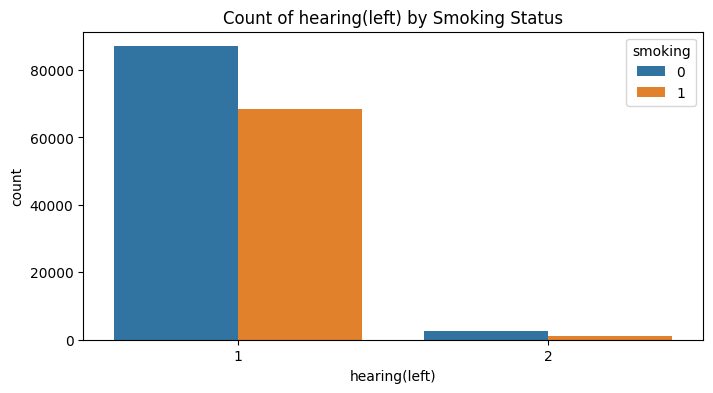

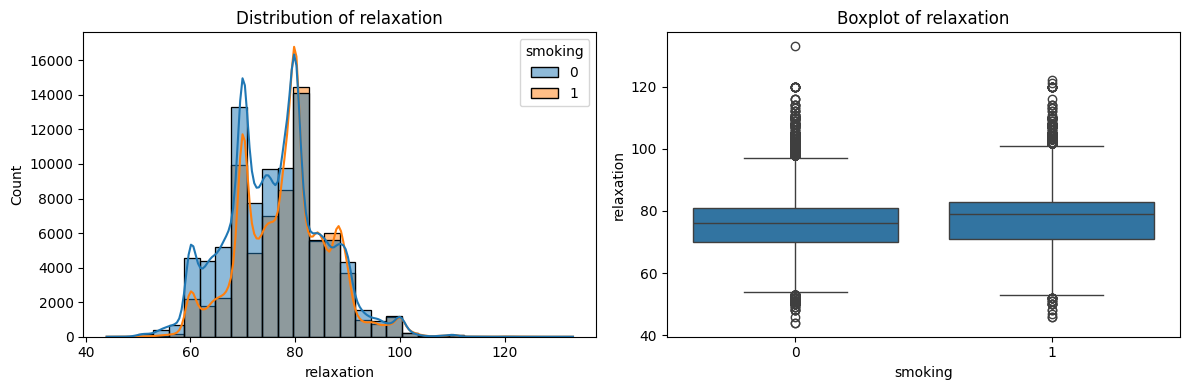

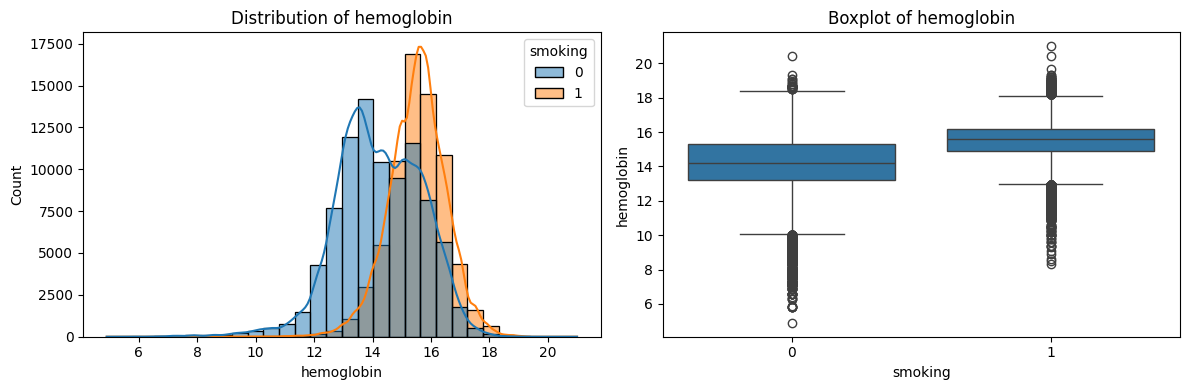

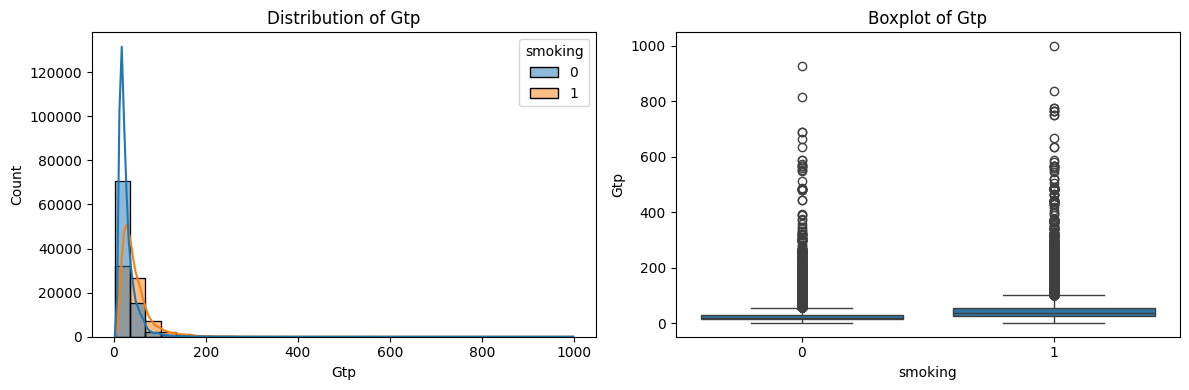

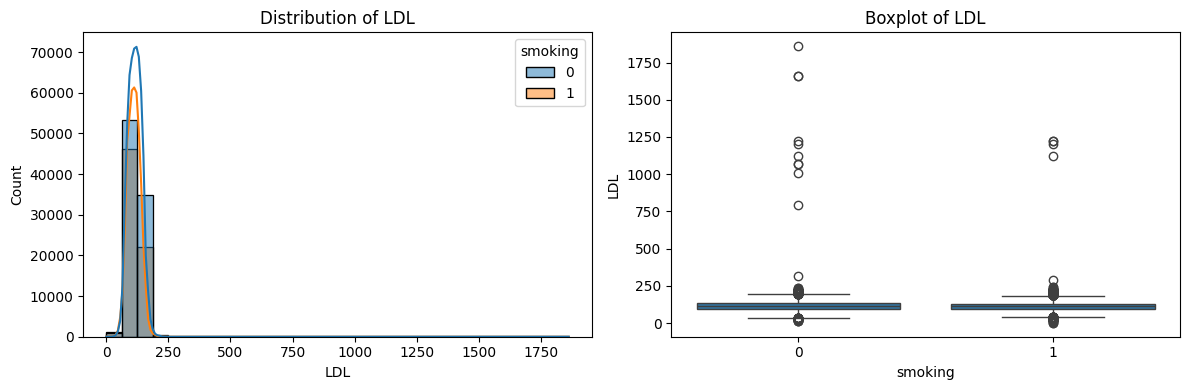

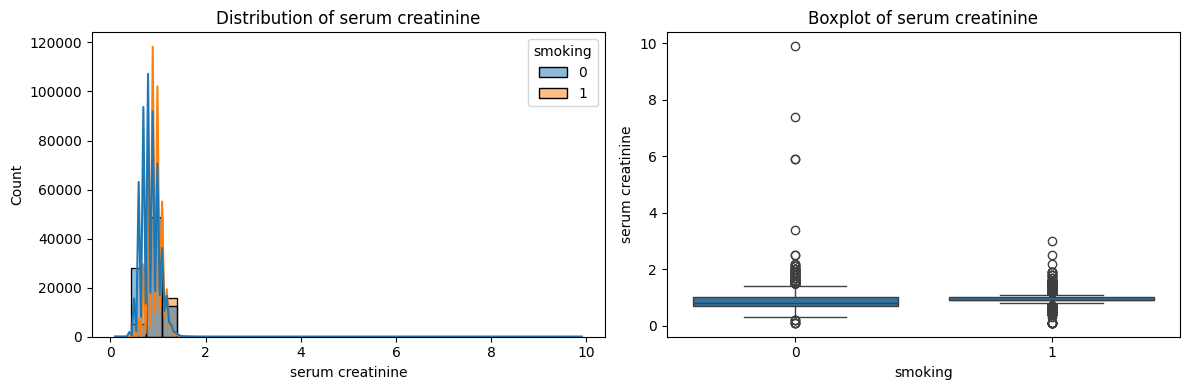

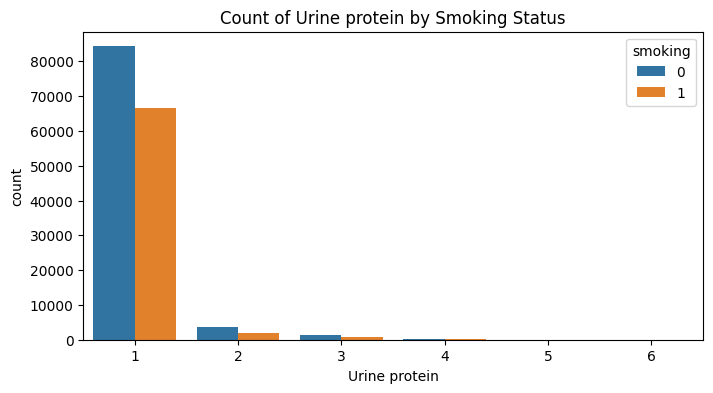

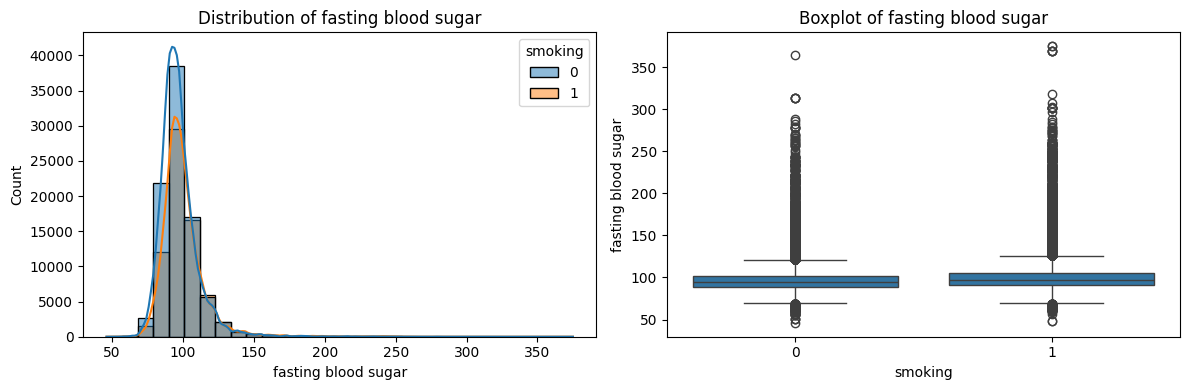

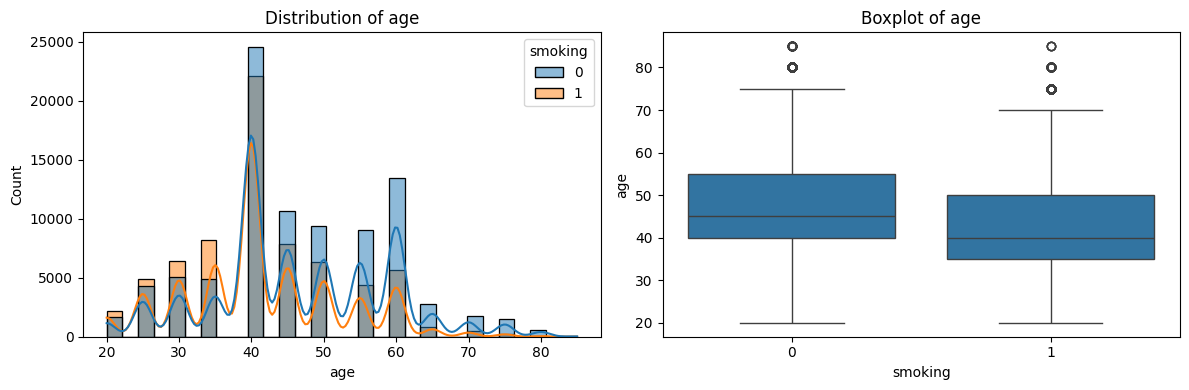

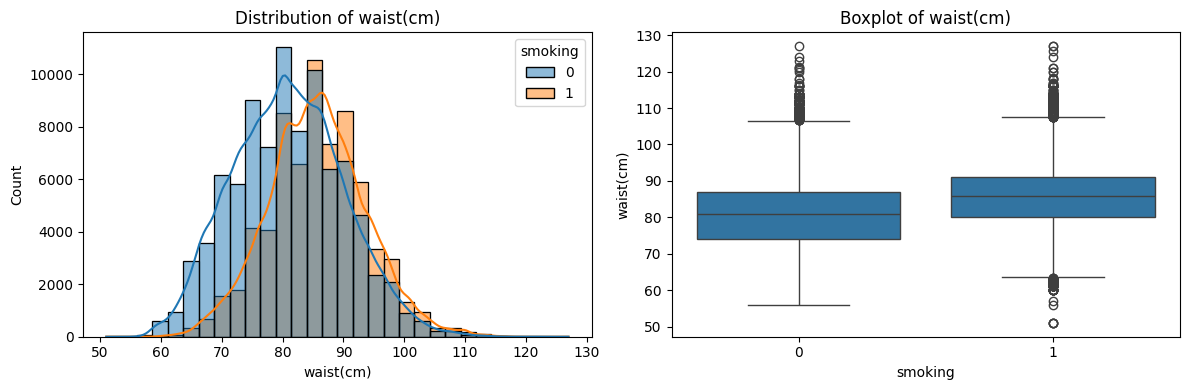

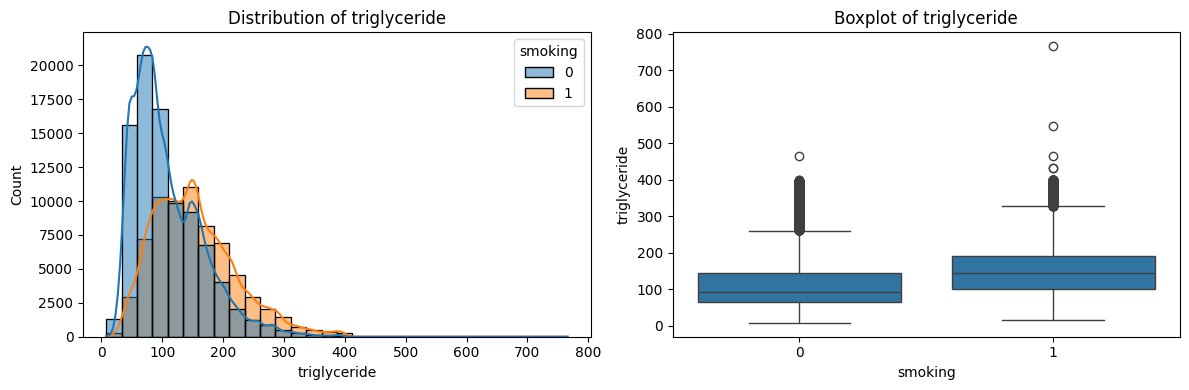

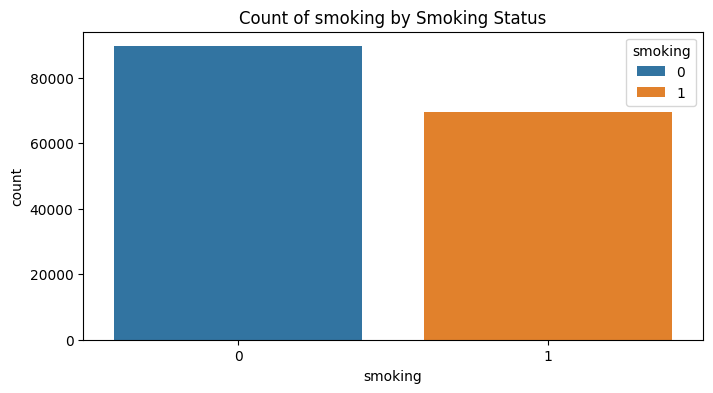

In [93]:


categorical_cols = ['hearing(left)', 'Urine protein', 'smoking']
numerical_cols = [col for col in df.columns if col not in categorical_cols]


for col in df.columns:
    if col in categorical_cols:
        
        plt.figure(figsize=(8, 4))
        sns.countplot(data=df, x=col, hue='smoking')
        plt.title(f'Count of {col} by Smoking Status')
        plt.show()
    else:
        
        plt.figure(figsize=(12, 4))
        plt.subplot(1, 2, 1)
        sns.histplot(data=df, x=col, kde=True, hue='smoking',  bins=30, alpha=0.5)
        plt.title(f'Distribution of {col}')
        
        plt.subplot(1, 2, 2)
        sns.boxplot(data=df, x='smoking', y=col)
        plt.title(f'Boxplot of {col}')
        plt.tight_layout()
        plt.show()

In [94]:
df.corr()  #correlations with values close to 0 ==> drop

,hearing(left),relaxation,hemoglobin,Gtp,LDL,serum creatinine,Urine protein,fasting blood sugar,age,waist(cm),triglyceride,smoking
hearing(left),1.000000,-0.011739,-0.051724,-0.021820,-0.011467,-0.009447,-0.007248,0.025334,0.212889,0.004759,-0.035088,-0.038219
relaxation,-0.011739,1.000000,0.230445,0.186684,0.073838,0.091648,-0.020445,0.152416,0.064924,0.291389,0.196251,0.109501
hemoglobin,-0.051724,0.230445,1.000000,0.306108,0.043565,0.461178,-0.024466,0.094061,-0.280851,0.418245,0.338815,0.450679
Gtp,-0.021820,0.186684,0.306108,1.000000,0.031424,0.180120,-0.016268,0.148289,-0.046879,0.294166,0.301060,0.305561
LDL,-0.011467,0.073838,0.043565,0.031424,1.000000,0.030572,-0.014978,0.010165,0.103529,0.114552,0.030834,-0.072285
serum creatinine,-0.009447,0.091648,0.461178,0.180120,0.030572,1.000000,0.000255,0.057923,-0.143808,0.294176,0.195891,0.272979
Urine protein,-0.007248,-0.020445,-0.024466,-0.016268,-0.014978,0.000255,1.000000,0.009406,-0.004526,-0.029491,-0.047448,-0.028548
fasting blood sugar,0.025334,0.152416,0.094061,0.148289,0.010165,0.057923,0.009406,1.000000,0.191913,0.209541,0.176266,0.096534
age,0.212889,0.064924,-0.280851,-0.046879,0.103529,-0.143808,-0.004526,0.191913,1.000000,-0.045369,-0.038063,-0.206033
waist(cm),0.004759,0.291389,0.418245,0.294166,0.114552,0.294176,-0.029491,0.209541,-0.045369,1.000000,0.394593,0.262715


Column	                     Min Valid	    Max Valid	


hemoglobin	                 5 g/dL	    20 g/dL 
Gtp (γ-GT)	                 5 U/L	    300 U/L	    
LDL	                         50 mg/dL	300 mg/dL	 
serum creatinine	         0.5 mg/dL	10 mg/dL	 
Urine protein	             1 (Normal)	6 (Severe)	 
fasting blood sugar	         50 mg/dL	300 mg/dL	




# Remove physiologically impossible values (world-record min/max thresholds)
# Sources: WHO, NIH, and clinical laboratory guidelines

In [95]:
df.drop_duplicates()
def remove_iqr_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR        
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

def remove_wrong_values(df, min_val, max_val, column):
    return df[(df[column] >= min_val) & (df[column] <= max_val)]

minimum = [5, 5, 50, 0.5, 1, 50]
maximum = [20, 300, 300, 10, 6, 300]
columns = ['hemoglobin', 'Gtp', 'LDL', 'serum creatinine', 'Urine protein', 'fasting blood sugar']

for min_val, max_val, column in zip(minimum, maximum, columns):
    df = remove_wrong_values(df, min_val, max_val, column)

        


## Feature Extraction (creating additional features that the model can benifit from )

In [96]:


df.loc[df['relaxation'] >= 78, 'stress_status'] = 'Stressed'
df.loc[df['relaxation'] < 78, 'stress_status'] = 'NotStressed'



df.loc[(df['age'] >= 20) & (df['age'] < 42), 'age_group'] = 'young'
df.loc[(df['age'] >= 42) & (df['age'] < 63), 'age_group'] = 'middle-aged'
df.loc[df['age'] >= 63, 'age_group'] = 'senior'

df['metabolic_risk_score'] = (
    df['fasting blood sugar'] +
    df['LDL'] +
    df['Gtp']
)
df['kidney_stress'] = df['serum creatinine'] * (df['Urine protein'] + 1)

df['smoker_liver_load'] = df['smoking'] * df['Gtp']

df['stress_sugar_ratio'] = df['fasting blood sugar'] / (df['relaxation'] + 1)

df['ldl_hb_ratio'] = df['LDL'] / (df['hemoglobin'] + 0.01)



df.head()

,hearing(left),relaxation,hemoglobin,Gtp,LDL,serum creatinine,Urine protein,fasting blood sugar,age,waist(cm),triglyceride,smoking,stress_status,age_group,metabolic_risk_score,kidney_stress,smoker_liver_load,stress_sugar_ratio,ldl_hb_ratio
0,1,87,16.5,27,75,1.0,1,94,55,81.0,300,1,Stressed,middle-aged,196,2.0,27,1.068182,4.542701
1,2,83,16.2,37,126,1.1,1,147,70,89.0,55,0,Stressed,senior,310,2.2,0,1.750000,7.772980
2,1,75,17.4,53,93,0.8,1,79,20,81.0,197,1,NotStressed,young,225,1.6,53,1.039474,5.341758
3,1,88,15.9,30,102,1.0,1,91,35,105.0,203,0,Stressed,young,223,2.0,0,1.022472,6.411062
4,1,76,15.4,17,93,0.8,1,91,30,80.5,87,1,NotStressed,young,201,1.6,17,1.181818,6.035042


## Bivariate

C:\Users\ecc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\axisgrid.py:186: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  figlegend = self._figure.legend(handles, labels, **kwargs)


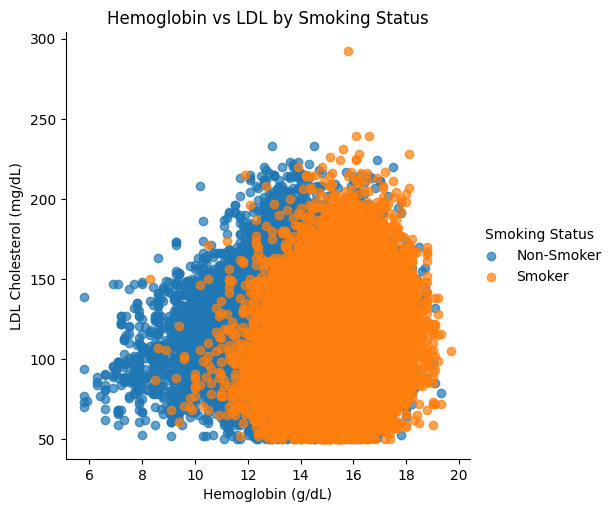

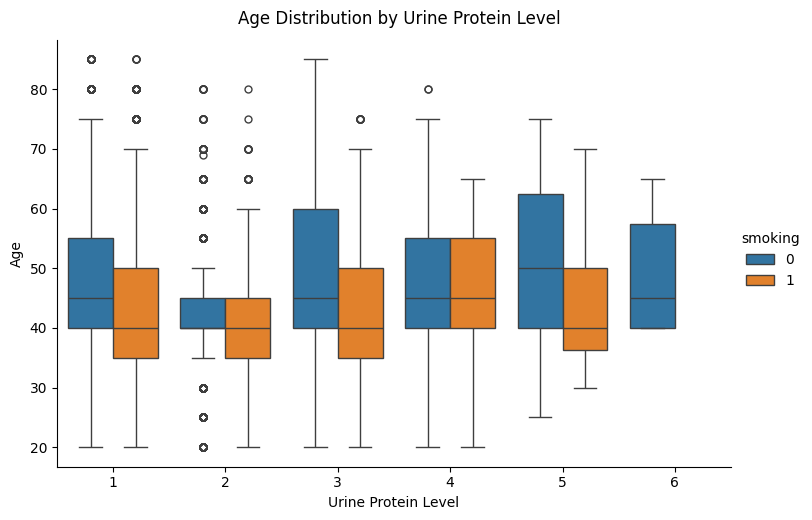

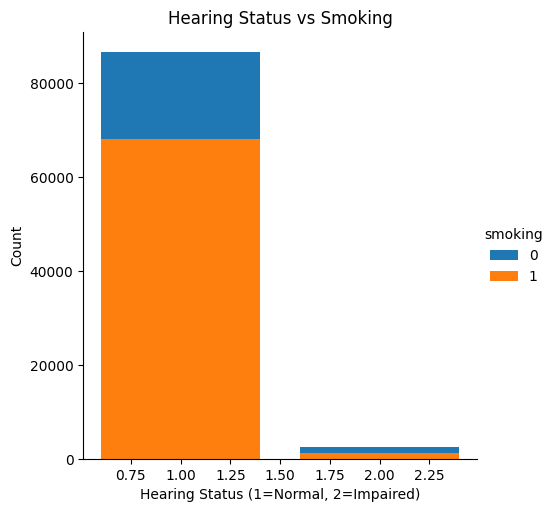

In [97]:
import seaborn as sns
import matplotlib.pyplot as plt


g1 = sns.FacetGrid(df, hue="smoking", height=5)
g1.map(plt.scatter, "hemoglobin", "LDL", alpha=0.7)
g1.add_legend(title="Smoking Status", labels=["Non-Smoker", "Smoker"])
plt.title("Hemoglobin vs LDL by Smoking Status")
plt.xlabel("Hemoglobin (g/dL)")
plt.ylabel("LDL Cholesterol (mg/dL)")
plt.show()


g2 = sns.catplot(
    data=df,
    x="Urine protein",
    y="age",
    hue="smoking",
    kind="box",
    height=5,
    aspect=1.5,
    order=[1, 2, 3, 4, 5, 6]  # assuming these are valid categories in your data
)

g2.set_axis_labels("Urine Protein Level", "Age")
g2.fig.suptitle("Age Distribution by Urine Protein Level", y=1.03)
plt.show()


cross_tab = pd.crosstab(df['hearing(left)'], df['smoking'])
g3 = sns.FacetGrid(cross_tab.unstack().reset_index(), hue='smoking', height=5)
g3.map(plt.bar, "hearing(left)", 0)  # 0 represents the count values
g3.add_legend()
plt.title("Hearing Status vs Smoking")
plt.xlabel("Hearing Status (1=Normal, 2=Impaired)")
plt.ylabel("Count")
plt.show()

## Normalaziation for  numerical featuress

In [98]:
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()


#numerical_cols = ['hearing(left)', 'relaxation', 'hemoglobin', 'Gtp', 'LDL',
      # 'serum creatinine', 'Urine protein', 'fasting blood sugar', 'age',
       #'waist(cm)', 'triglyceride', 
       #'metabolic_risk_score', 'kidney_stress', 'smoker_liver_load',
       #'stress_sugar_ratio', 'ldl_hb_ratio']



#df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

#print(df.head())



In [99]:
print(df['smoking'].value_counts(normalize=True))


smoking
0    0.562534
1    0.437466
Name: proportion, dtype: float64


In [100]:
# Include 'smoking' in your numerical columns list along with Cholesterol and Waist
numerical_cols = [
    'hearing(left)', 'relaxation', 'hemoglobin', 'Gtp', 'LDL',
       'serum creatinine', 'Urine protein', 'fasting blood sugar', 'age',
       'waist(cm)', 'triglyceride', 'smoking', 
       'metabolic_risk_score', 'kidney_stress', 'smoker_liver_load',
       'stress_sugar_ratio', 'ldl_hb_ratio'
]
print(df.columns)  # This will print the list of column names in the DataFrame



# Select only the relevant columns from the dataframe
df = df[numerical_cols]

# Calculate the correlations with smoking
correlations = df.corr()['smoking']

# Sort the correlations in descending order
SortedDicts = {k: v for k, v in sorted(correlations.items(), key=lambda item: item[1], reverse=True)}

# Output the sorted correlations
SortedDicts


Index(['hearing(left)', 'relaxation', 'hemoglobin', 'Gtp', 'LDL',
       'serum creatinine', 'Urine protein', 'fasting blood sugar', 'age',
       'waist(cm)', 'triglyceride', 'smoking', 'stress_status', 'age_group',
       'metabolic_risk_score', 'kidney_stress', 'smoker_liver_load',
       'stress_sugar_ratio', 'ldl_hb_ratio'],
      dtype='object')


{'smoking': 1.0,
 'smoker_liver_load': 0.735996616396269,
 'hemoglobin': 0.4503218565568188,
 'Gtp': 0.3351952291177877,
 'triglyceride': 0.33215609111665295,
 'serum creatinine': 0.2717942165849147,
 'waist(cm)': 0.2628117951562974,
 'metabolic_risk_score': 0.20291158337231174,
 'kidney_stress': 0.17896357400588725,
 'relaxation': 0.10891124047441265,
 'fasting blood sugar': 0.09682222851771853,
 'stress_sugar_ratio': 0.008352064580966465,
 'Urine protein': -0.029208385240302833,
 'hearing(left)': -0.038451993907540075,
 'LDL': -0.07641738420853375,
 'age': -0.2060368484083766,
 'ldl_hb_ratio': -0.2586116889032746}

##  getting the best  n features from our data and dropping the least important 

In [110]:
from sklearn.feature_selection import SelectPercentile,chi2 ,f_classif,SelectKBest
def FeatureSelectionByNumber(X, y, Number):
    FeatureSelection = SelectKBest(score_func=f_classif, k=Number)
    X_Selected = FeatureSelection.fit_transform(X, y)
    NewData = pd.DataFrame(X_Selected, columns=[i for i, j in zip(X.columns, FeatureSelection.get_support()) if j])
    NewData['smoking'] = y
    return NewData
X = df.drop(columns=['smoking'])
y = df['smoking']  
NewData = FeatureSelectionByNumber(X, y, 9)


In [111]:
features_with_na = [feature for feature in df.columns if df[feature].isnull().any()]

if not features_with_na:  
    print("No missing values found in any column!")
else:
    for feature in features_with_na:
        missing_percentage = np.round(df[feature].isnull().mean() * 100, 4)
        print(f"{feature}: {missing_percentage}% missing values")
        
num_duplicates = df.duplicated().sum()        
print(f"number of duplcated rows is {num_duplicates}")

No missing values found in any column!
number of duplcated rows is 1


In [112]:
NewData.to_csv('newdataframe.csv', sep=',', index=False, encoding='utf-8')